In [18]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from importnb import Notebook

with Notebook():
  import MissingData

df = MissingData.df_complete

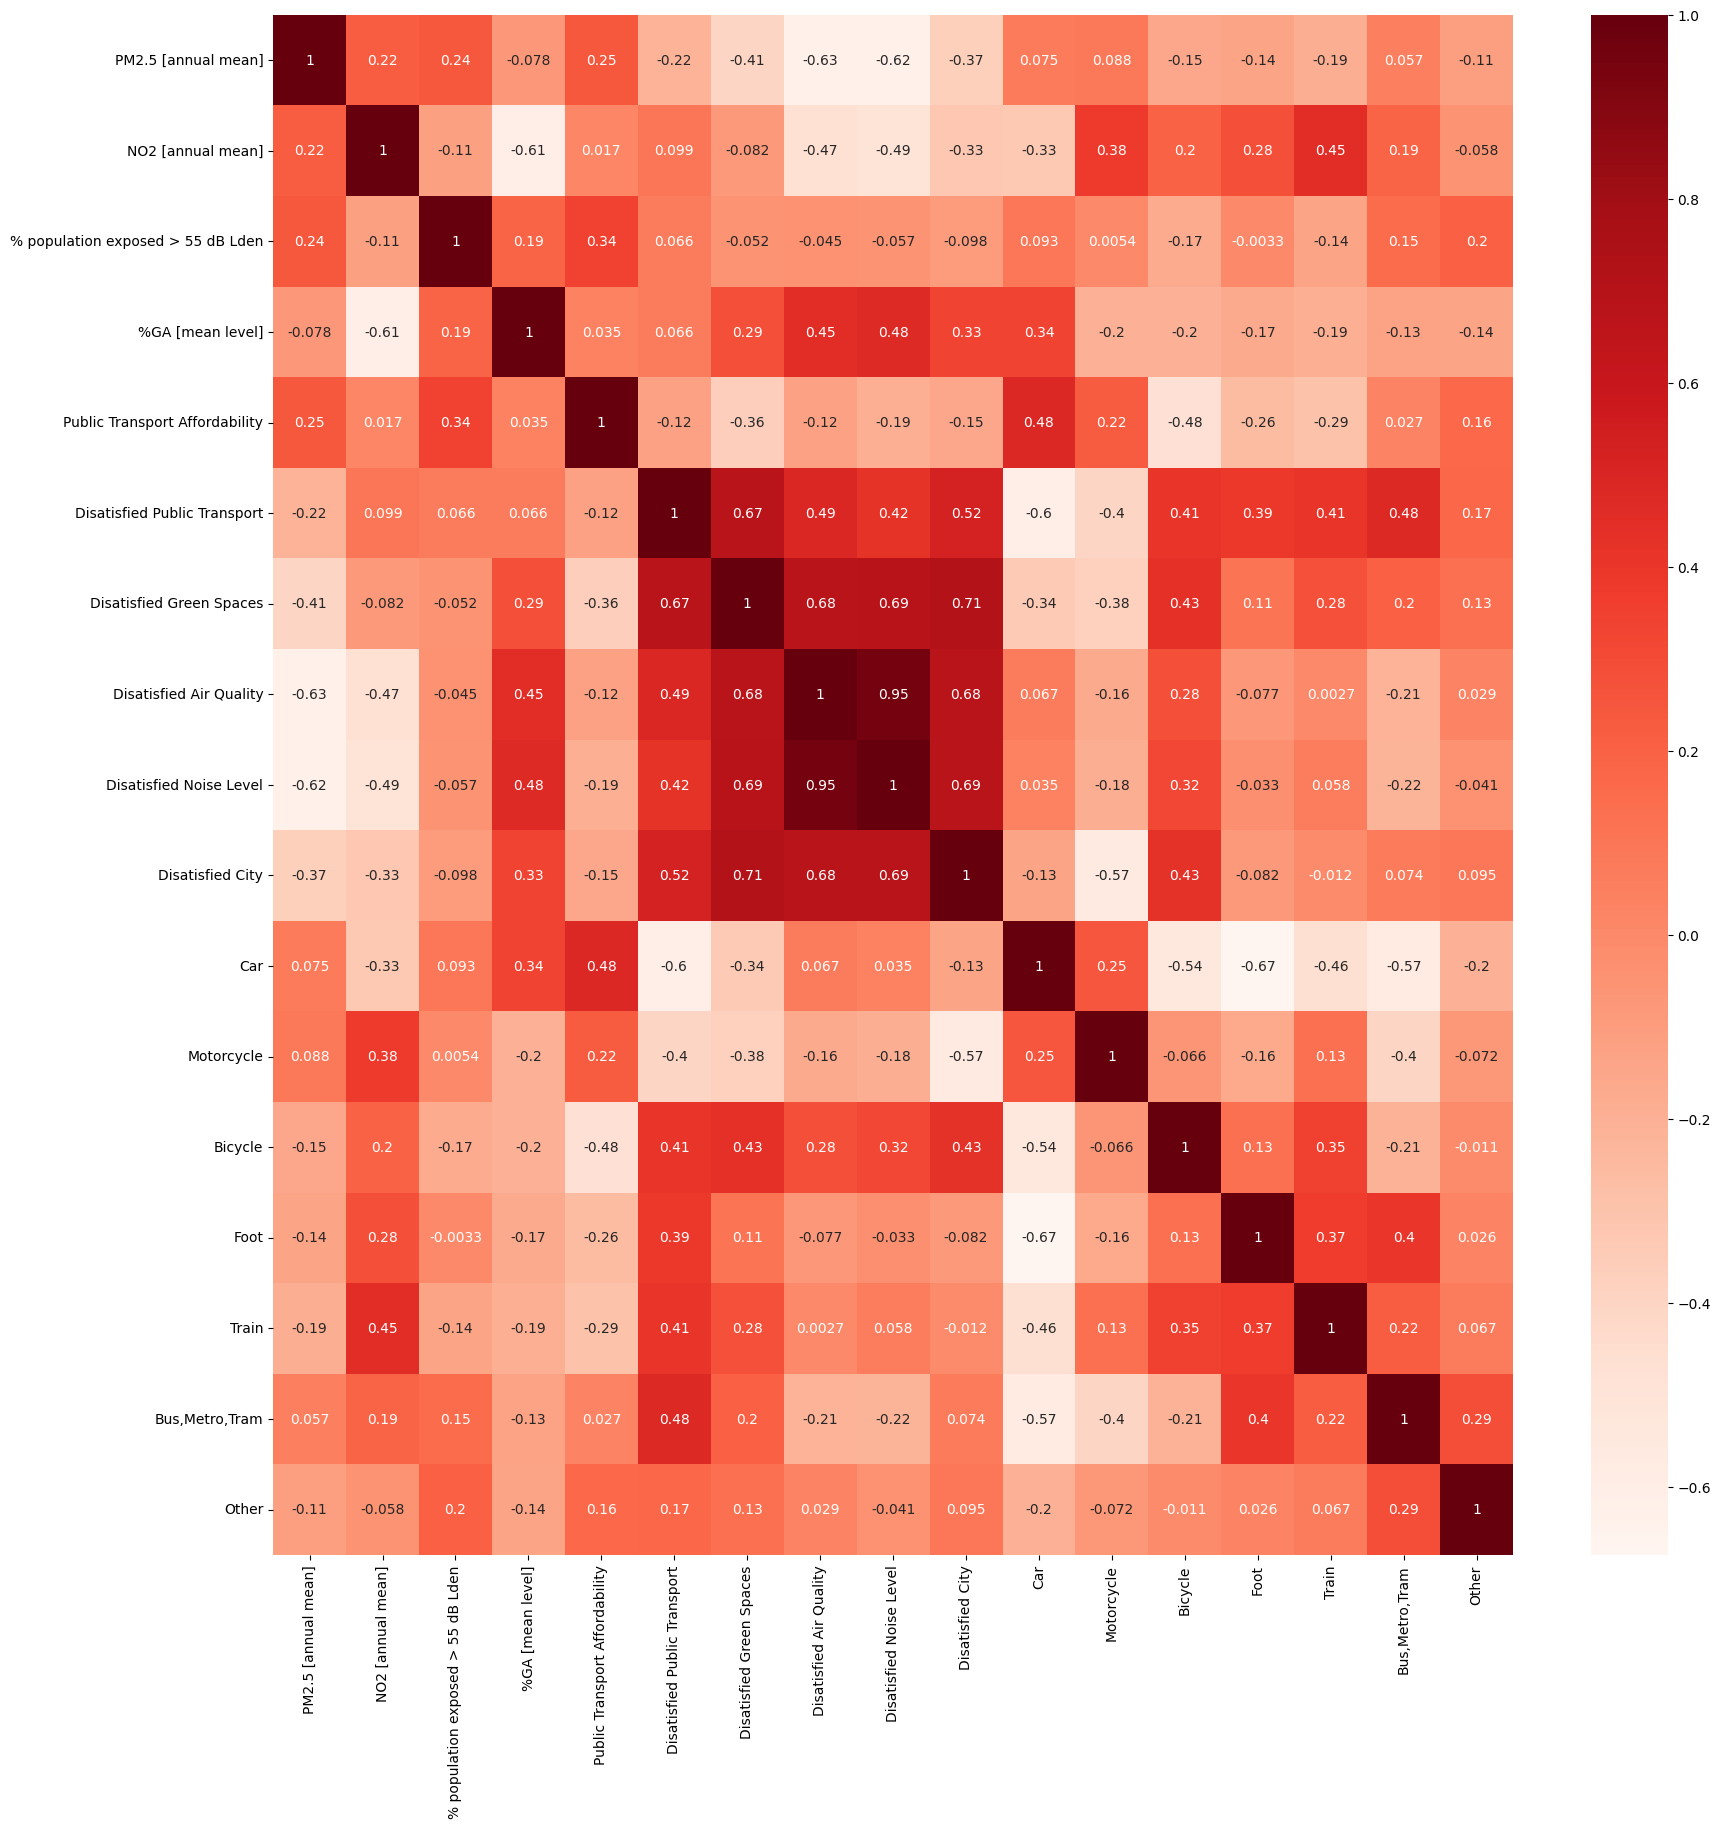

In [19]:
df_num = df.drop(columns=['City'])
figure(num=None, figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.heatmap(df_num.corr(), annot=True, cmap = 'Reds')
plt.show()

In [21]:
# Combine Distatisfied Air Quality and Disatisfied Noise Level

to_be_combined = df[['Disatisfied Air Quality', 'Disatisfied Noise Level']].copy()
print(to_be_combined)

pca = PCA(n_components=1)
pca1 = pca.fit_transform(to_be_combined)

print(pca1)

scaler = MinMaxScaler()
pca1_scaled = scaler.fit_transform(pca1)

df['Disatisfied - Loud and Polluted'] = pca1_scaled
df = df.drop(columns=['Disatisfied Air Quality', 'Disatisfied Noise Level'])

print(df)


    Disatisfied Air Quality  Disatisfied Noise Level
0                  0.619535                 0.609211
1                  0.117152                 0.100259
2                  0.745997                 0.622528
3                  0.449517                 0.579264
4                  0.460617                 0.450841
5                  0.000000                 0.000000
6                  0.380403                 0.368807
7                  0.653813                 0.745321
8                  0.907612                 1.000000
9                  1.000000                 0.929076
10                 0.530758                 0.486220
11                 0.688718                 0.757035
12                 0.860078                 0.901169
13                 0.277906                 0.233851
14                 0.742376                 0.668347
15                 0.089801                 0.234331
16                 0.589737                 0.515861
17                 0.694924                 0.